# US MEDICAL INSURANCE COST
* Notebook's goal: Determine the person's characteristic with costly medical insurance.
* Data: Develop an exploratory data analysis.
* Analysis: Conclude the data analysis. 
## I. Importing the necessary tools
First, we will need mainly:
  1. Data frames.
  2. Visualizations.
  
We'll import Pandas, Matplotlib and Seaborn library.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## II. Loading the data

We'll load the data into a Pandas data frame using the read_csv function specifying a path and a delimiter. We'll also use the head method to look how the first 5 rows are.

In [18]:
data = pd.read_csv('insurance.csv', delimiter=',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# III. Exploring the data
### 3.1 General description

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 non-null values in each variable. The columns make a total of 7 with variables like age, sex, bmi, children, smoker, region, charges. The dataset also is distributed among 4 numeric variables and 3 binary categorical variables.


### 3.2 Missing values visualization

<Axes: >

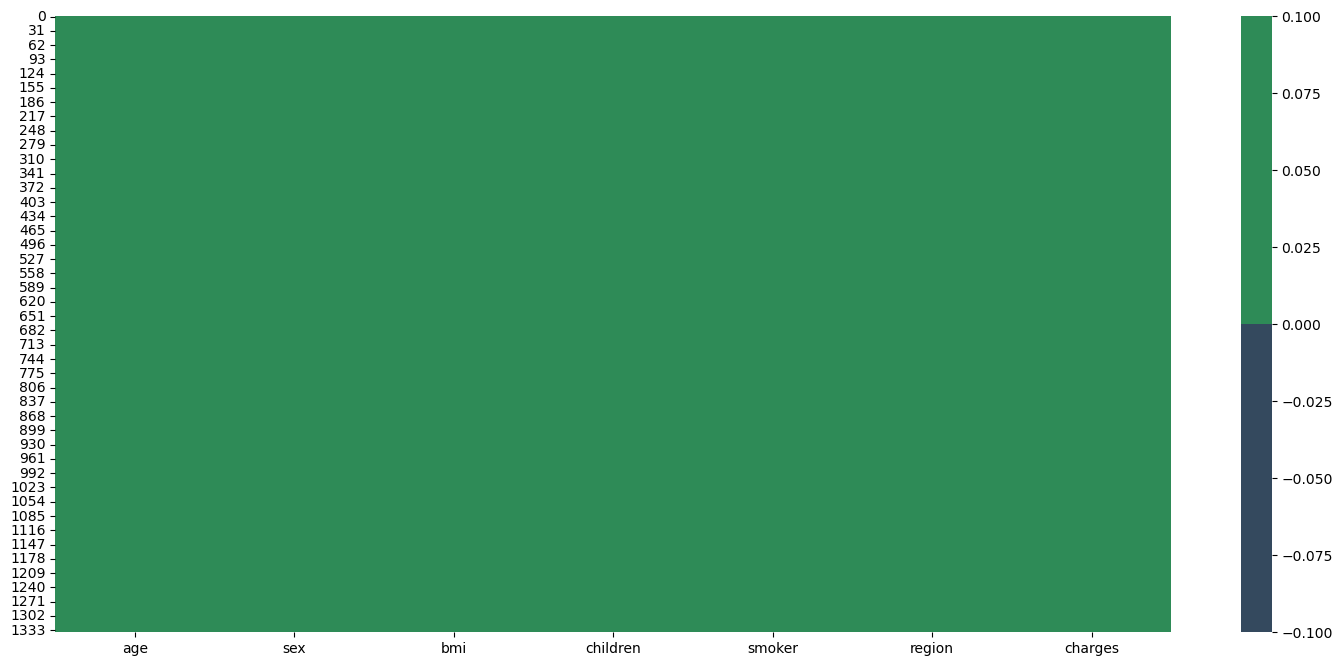

In [20]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

This visualization confirms no missing values in the dataset. In other words, no missing values in all rows.

### 3.3 Numeric variables description

In [21]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


THe above table shows the count, mean, standard deviation, min, 25th percentile (lower quartile), 50th percentile (median), 75th percentile (upper quartile) and max values of each numerical column in the dataframe.

* Age variable has no missing values. it ranges from 18 to 64 where its mean is 39.20 years old, a standard deviation of 14.05, 25% of the ages fall below 27 years old(ages from 18 to 26 make the 25% of the age subdataset), the middle value that divides into two equal parts is 39 years old(ages from 18 to 38 make the 50% of the age subdataset) and 75% of ages fall below 51 years old (age from 18 to 50).  
* Bmi variable has no missing values. it ranges from 15.96 to 53.13 where its mean is 30.66 kg / m ^ 2, a standard deviation of 6.1, 25% of the ages fall below 26.3 kg/m^2 (bmi from 15.96 to 26.8 aproximately make the 25% of the bmi subdataset), the middle value that divides into two equal parts is 30.40 kg/m^2 (bmi from 15.96 to 30.39 make the 50% of the bmi subdataset) and 75% of ages fall below 34.69 kg/m^2 (bmi from 15.96 to 34.68).
* Children variable has no missing values. it ranges from 0 to 5 where its mean is 1.1 children, a standard deviation of 1.21, 25% of the primary beneficiaries has no children, the middle value that divides into two equal parts is 1 which means that some primary beneficiaries have at most 1 child and 75% of the children subset some primary beneficiaries have at most 2 children.  
* Charges variable has no missing values. it ranges from 1121.87 to 63770.43 where its mean is 13270.42 dollars, a standard deviation of 12110.01, 25% of the charges fall below 4740.29 dollars(charges from 1121.87 to 4740.28 make the 25% of the charges subdataset), the middle value that divides into two equal parts is 9382.03 dollars(charges from 1121.87 to 9381 make the 50% of the charges subdataset) and 75% of ages fall below 16639.91 dollars (charges from 1121.87 to 16639.90).  

### 3.4 Outliers in Numeric variables

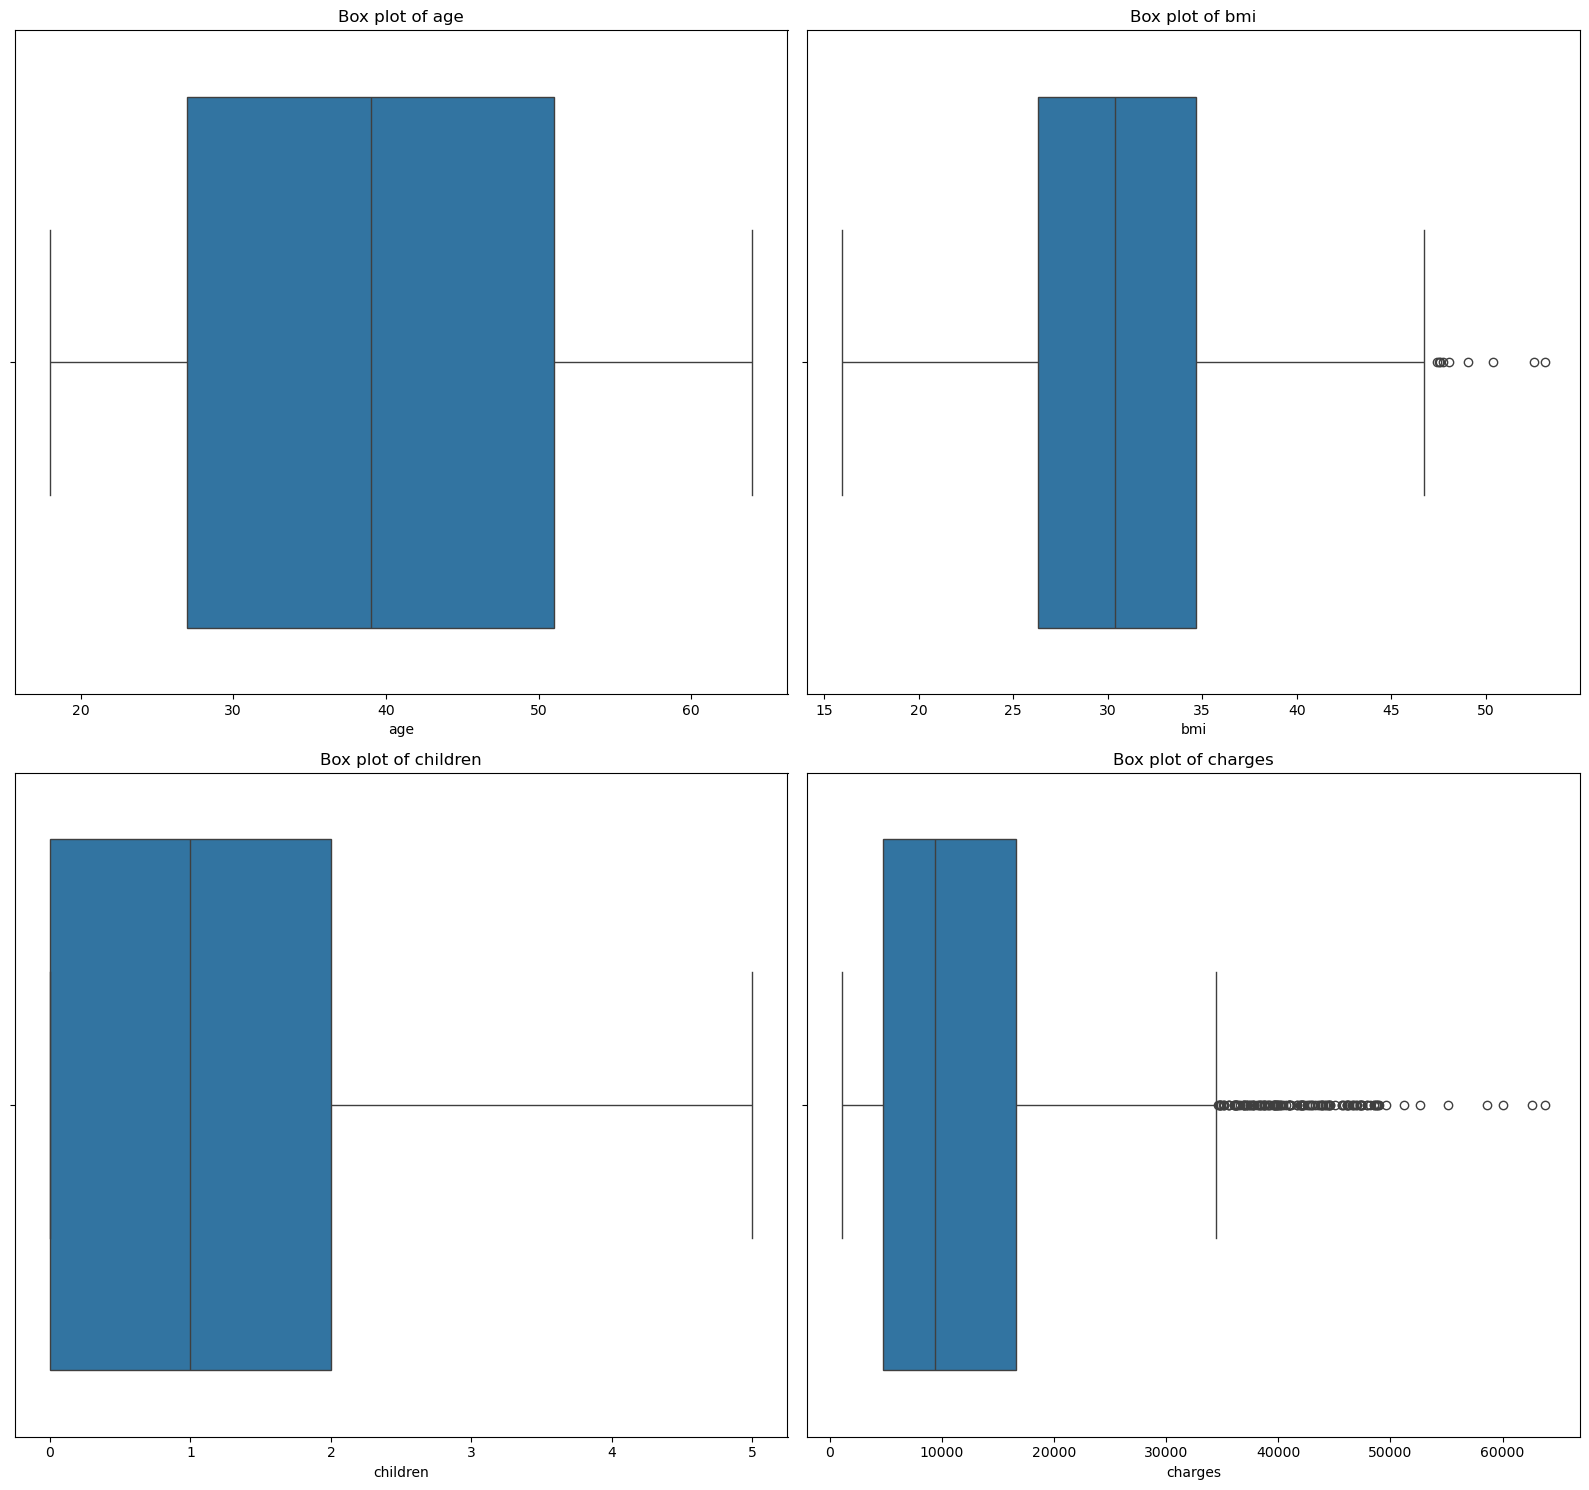

In [22]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

def box_plot_numeric_variables(numeric_columns):
    fig = plt.figure(figsize=(16,15))
    for i, column in enumerate(numeric_columns):
        # Change the number of rows and columns as you please in the following line
        ax = fig.add_subplot(2, 2, i+1)
        sns.boxplot(x=data[column], ax=ax) # change with histplot/ boxenplot
        ax.set_title(f"Box plot of {column}")
    
    plt.tight_layout()
    plt.show()

box_plot_numeric_variables(numeric_columns)

* Bmi and charges variables have outliers in their subdatasets.

### 3.5 Binary categorical variables description

In [23]:
data[['sex','smoker','region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* Sex and smoker are binary variables. What is left is to know it unique values.
* Region variable is a categorical variable. Let's find its unique values.

In [24]:
binary_categorical_columns = ['sex','smoker','region']

def show_unique_values(name_df, columns):
    
    for column in columns:
        print(f"Unique values in {column}: {data[column].unique()}")
    

show_unique_values(data, binary_categorical_columns)


Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


### 3.6 Conclusion of the exploratory part

1. Age: age of primary beneficiary.
2. Sex: insurance contractor gender, female, male.
3. Bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
4. Children: Number of children covered by health insurance / Number of dependents.
5. Smoker: Smoking.
6. Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. Charges: Individual medical costs billed by health insurance.

| Column   | Variable type   |Missing values| Outliers      | Unit/Binary/Category |
| -------- | ------- | --------- | ------------------ | ----------- | 
| Age      | Numeric    | 0 | NO | years old          | 
| Sex      | Binary    | 0 | NO | female, male           | 
| Bmi      | Numeric    | 0 | YES | kg / m ^ 2           | 
| Children | Numeric    | 0 | NO  | number of dependents           |
| Smoker  | Binary   | 0 | NO |  yes, no    | 
| Region  | Categorical    | 0 | NO | southwest, southeast, northwest, northeast    |
| charges  | Numeric    | 0 | YES | dollars    | 

# IV. Analysis 

We will analyze the insurance dataset and answer the following questions:

* Find out the average age of the patients in the dataset.
* Analyze where a majority of the individuals are from.
* Look at the different costs between smokers vs. non-smokers.
* Figure out what the average age is for someone who has at least one child in this dataset.

### 4.1 Average age, Average charge, highest charge by age and age vs charges

In [25]:
avg_age = data['age'].mean()
print(f'The average age of patient is: {avg_age:.2f}')

The average age of patient is: 39.21


In [54]:
avg_charge = data['charges'].mean()
print(f'The average charge of patient is: {avg_charge:.2f}')

The average charge of patient is: 13270.42


In [34]:
mean_charges_by_age = data.groupby('age')['charges'].mean()

age_with_highest_charges = mean_charges_by_age.idxmax()
highest_mean_charges_age = mean_charges_by_age.max()

print(f"The age with the highest average charges is: {age_with_highest_charges}")
print(f"The highest average charges are: {highest_mean_charges_age:.2f}")


The age with the highest average charges is: 64
The highest average charges are: 23275.53


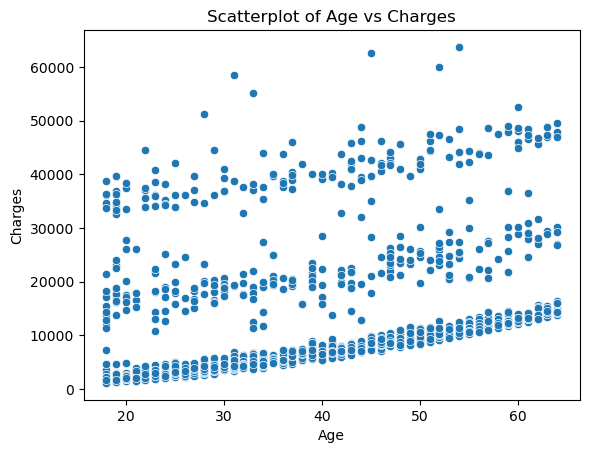

In [27]:
sns.scatterplot(x='age', y='charges', data=data)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatterplot of Age vs Charges')

plt.show()

### 4.2 Majority of Individuals by Region

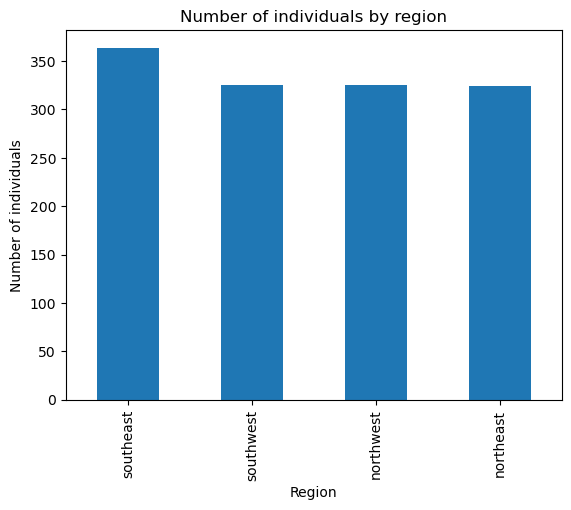

In [28]:
region_count = data['region'].value_counts()
region_count.plot(kind='bar')
plt.title('Number of individuals by region')
plt.xlabel('Region')
plt.ylabel('Number of individuals')
plt.show()

The majority of individuals come from southeast region.

In [29]:
mean_charges_by_region = data.groupby('region')['charges'].mean()

region_with_highest_charges = mean_charges_by_region.idxmax()
highest_mean_charges_region = mean_charges_by_region.max()

print(f"The region with the highest average charges is: {region_with_highest_charges}")
print(f"The highest average charges are: {highest_mean_charges_region:.2f}")


The region with the highest average charges is: southeast
The highest average charges are: 14735.41


### 4.3 Cost Differences for Smokers vs. Non-Smokers

In [30]:
cost_smoker = round(data.groupby('smoker')['charges'].mean(), 2)
#cost_smoker

print(f"The average cost for non-smokers is: {cost_smoker.iloc[0]}")
print(f"The average cost for smokers is: {cost_smoker.iloc[1]}")


The average cost for non-smokers is: 8434.27
The average cost for smokers is: 32050.23


### 4.4 Average Age of Individuals with Children

In [31]:
individuals_withchildren = data[data['children'] > 0]

avg_individual_with_children = individuals_withchildren['age'].mean()

print(f'The average age of individuals with children is: {avg_individual_with_children:.2f} years.')

The average age of individuals with children is: 39.78 years.


### 4.5 Correlations

We found a positive correlation in charges vs age, charges vs bmi and charges vs children. 

In [ ]:
numeric_data = data.select_dtypes(include=[float, int])

correlations = numeric_data.corr()
influential_features = correlations['charges'].sort_values(ascending=False)
print("Features most influential for medical insurance charges based on correlation:")
print(influential_features)

Features most influential for medical insurance charges based on correlation:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


We save our finding in a dictionary.

In [55]:
findings = {
    'avg_age': avg_age,
    'avg_charge': avg_charge,
    'mean_charges_by_age': mean_charges_by_age.to_dict(),
    'age_with_highest_charges': age_with_highest_charges,
    'highest_mean_charges_age': highest_mean_charges_age,
    'region_count': region_count.to_dict(),
    'mean_charges_by_region': mean_charges_by_region.to_dict(),
    'region_with_highest_charges': region_with_highest_charges,
    'highest_mean_charges_region': highest_mean_charges_region,
    'cost_smoker': cost_smoker.to_dict(),
    'avg_individual_with_children': avg_individual_with_children
}

In [60]:
findings['avg_charge']

13270.422265141257

In [59]:
findings['highest_mean_charges_region']

14735.41143760989

In [ ]:
'''corr = data[['age', 'bmi', 'children', 'charges']]
corr_mtrx = corr.corr()
sns.heatmap(corr_mtrx, annot=True, cmap='coolwarm')'''

# V. Potential biases

1. Age distribution: If certain age groups are underrepresented, predictions for those ages may be less accurate.
2. Region representation: Some regions may have more data, leading to a regional bias.
3. Smoking status: Differences in the proportion of smokers vs. non-smokers.
4. Gender distribution: If one gender is underrepresented, predictions might be biased.

These biases affect generalizability and accuracy of any findings.


# VI. Conclusion

The exploratory data analysis on the medical insurance dataset helps us understand that variables like age, bmi, children, smoking status increase the cost of a medical insurance.